# Plots.jl gallery

Sources:

- [PlotsGallery.jl](https://github.com/goropikari/PlotsGallery.jl) by goropikari
- [Julia Plots docs](https://docs.juliaplots.org/)

## Attributes

<https://docs.juliaplots.org/stable/attributes/>

In [1]:
using Plots, Measures

### Ticks size and properties

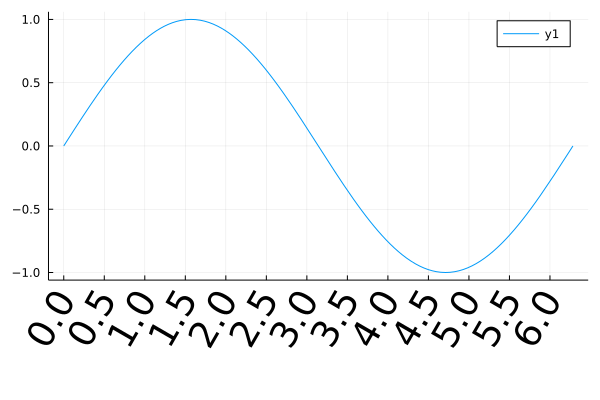

In [2]:
plot(sin, 0, 2π;
    xticks=0:0.5:2π,
    xrotation=60,
    xtickfontsize=25,
    bottom_margin=15mm)

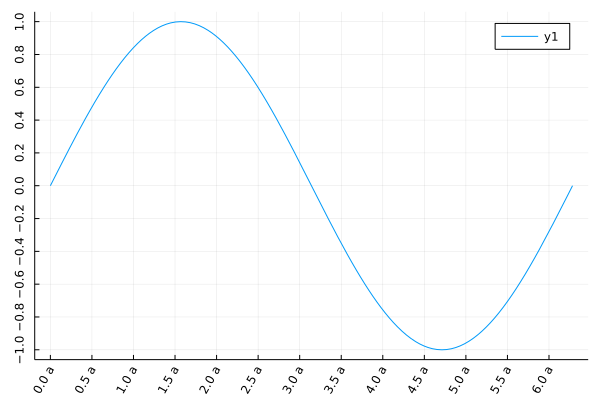

In [3]:
plot(sin, 0, 2π;
    xtick=(0:0.5:2π, ["$i a" for i in 0:0.5:2π]),
    ytick=-1:0.2:1,
    xrotation=60, ## -> rotate xticks 60 degree
    yrotation=90,
)

### No axis

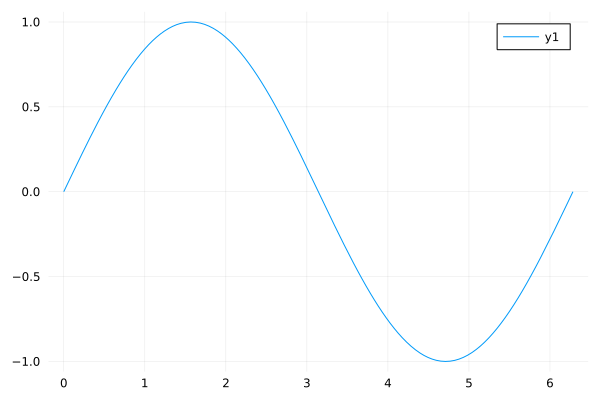

In [4]:
plot(sin, 0, 2π, axis=false)

### Log scale for axes

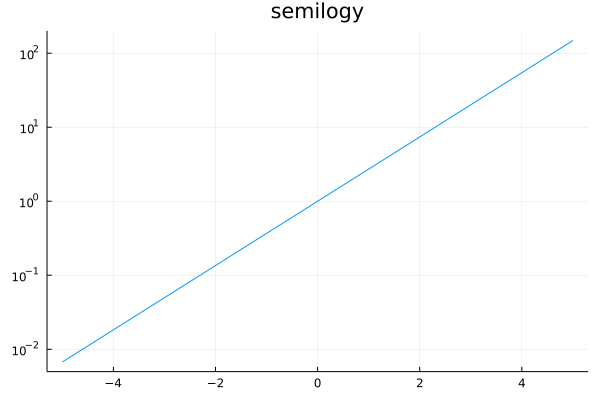

In [5]:
plot(exp, -5, 5, yscale=:log10, title="semilogy", legend=nothing)

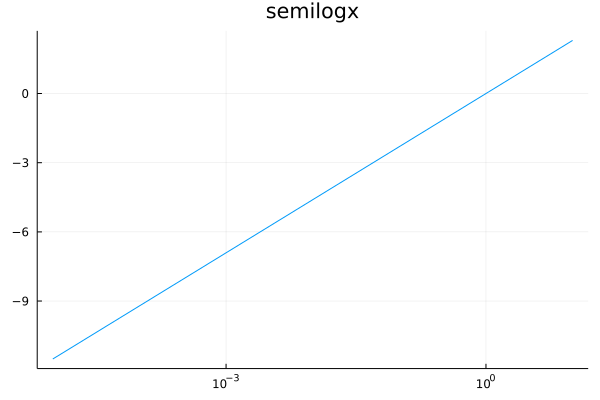

In [6]:
plot(log, 1e-5, 10, xscale=:log10, title="semilogx", legend=nothing)

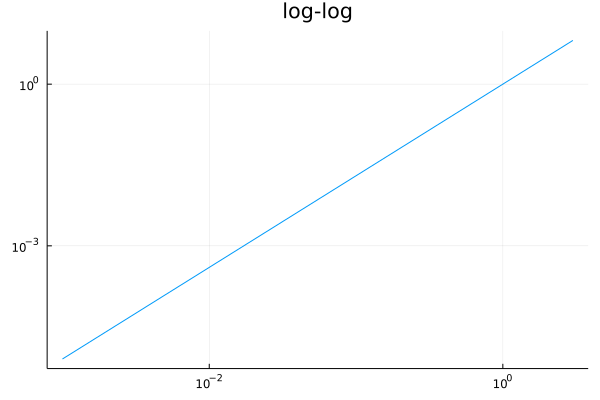

In [7]:
plot(x->x^1.7, 1e-3, 3, scale=:log10, title="log-log", legend=nothing)

### Axis range

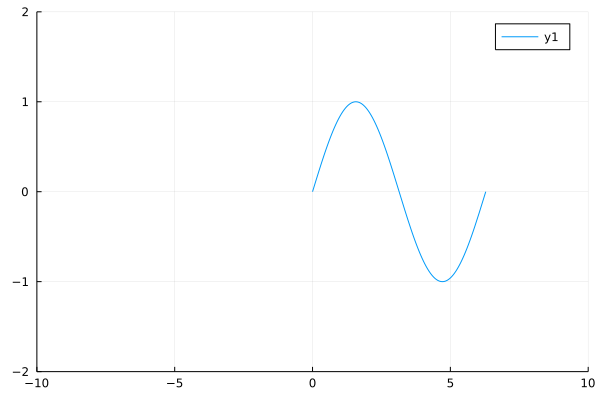

In [8]:
plot(sin, 0, 2π, xlims=(-10, 10), ylims=(-2,2))

### Scietific notation

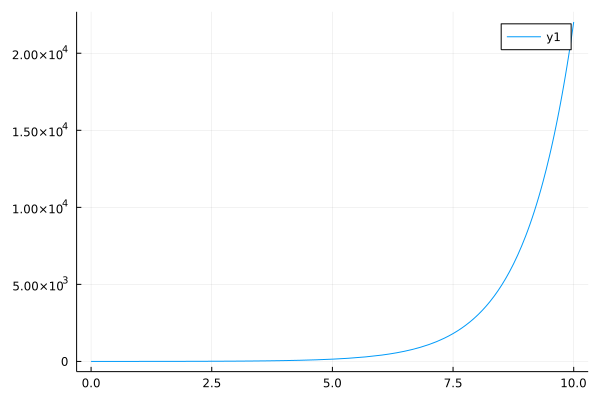

In [9]:
plot(exp, 0, 10, yformatter=:scientific)

### Flip Axis 

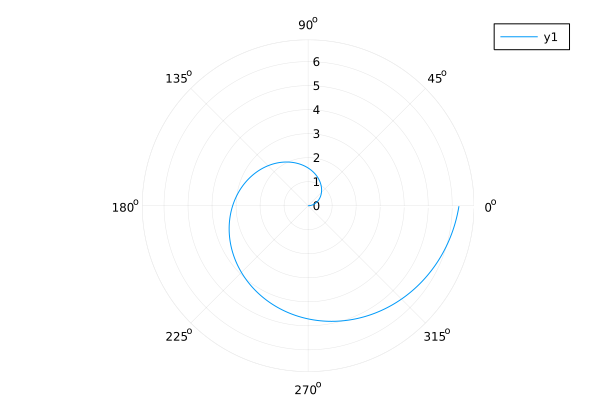

In [10]:
plot(identity, 0:0.01:2π,
    proj=:polar,
    xflip=true,
    yflip=true,
    # flip=true # x,y-flip
)

### Aspect ratio

In [11]:
using Plots
using Random
Random.seed!(2021)

TaskLocalRNG()

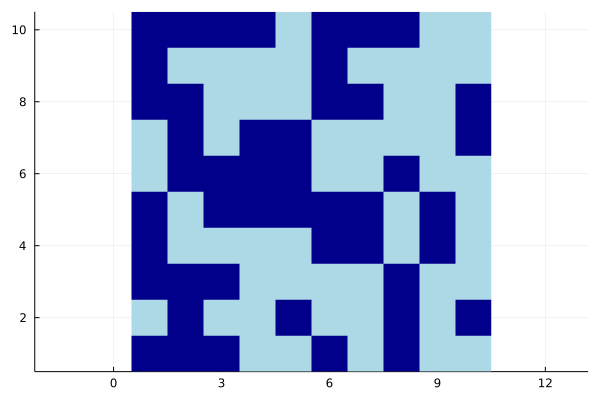

In [12]:
s = bitrand(10, 10)
heatmap(s,
        aspect_ratio=:equal,
        c=:blues,
        colorbar=false)

### Fonts

LaTeX fonts are supported via `LaTeXStrings` package.

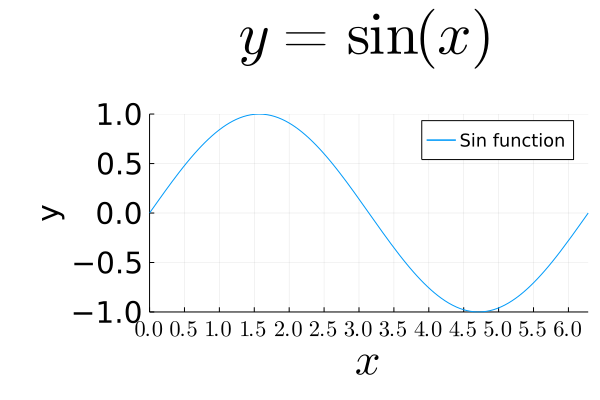

In [13]:
using Plots, Measures, LaTeXStrings

plot(sin, 0, 2π,
    title=L"y = \sin(x)",
    titlefont=font(40), ## title

    xlabel=L"x",
    ylabel="y",
    xguidefontsize=30, ## x-guide
    yguidefontsize=20, ## y-guide
    # guidefontsize=20, # both x,y-guide

    xtick=(0:0.5:2π, ["\$ $(i) \$" for i in 0:0.5:2π]),
    ytick=-1:0.5:1,
    xtickfontsize=15,
    ytickfontsize=20,
    # tickfontsize=10, # for both x and y

    label="Sin function",
    legendfontsize=12,

    xlims=(0,2π),
    ylims=(-1,1),
    bottom_margin=5mm,
    left_margin=10mm,
    top_margin=15mm
)

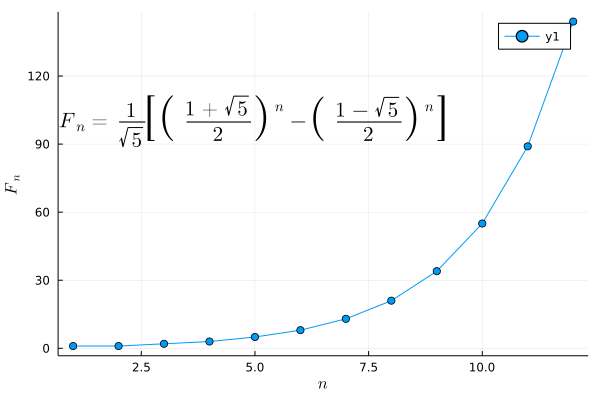

In [14]:
fib(x) = (((1+sqrt(5))/2)^x - ((1-sqrt(5))/2)^x)/sqrt(5)

ann = L"F_n = \frac{1}{\sqrt{5}} \left[\left( \frac{1+\sqrt{5}}{2} \right)^n - \left( \frac{1-\sqrt{5}}{2} \right)^n \right]"

plot(fib, 1:12, marker=:circle, xlabel=L"n", ylabel=L"F_n", annotation=(5, 100, ann))

## Bar plots

In [15]:
using Plots, StatsPlots, StatsBase, Random
Plots.gr(fmt=:png)
Random.seed!(2021)

# Data
measles = [38556, 24472, 14556, 18060, 19549, 8122, 28541, 7880, 3283, 4135, 7953, 1884]
mumps = [20178, 23536, 34561, 37395, 36072, 32237, 18597, 9408, 6005, 6268, 8963, 13882]
chickenPox = [37140, 32169, 37533, 39103, 33244, 23269, 16737, 5411, 3435, 6052, 12825, 23332]

ticklabel = string.(collect('A':'L'))

12-element Vector{String}:
 "A"
 "B"
 "C"
 "D"
 "E"
 "F"
 "G"
 "H"
 "I"
 "J"
 "K"
 "L"

### Grouped vertical bar plots

Requires `StatsPlots` package.

Use `groupedbar(data, bar_position = :dodge)`

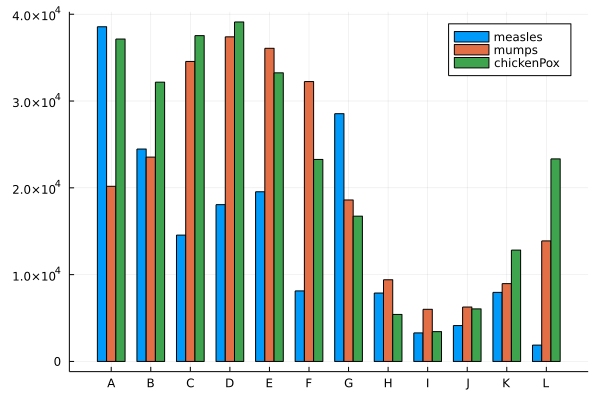

In [16]:
groupedbar([measles mumps chickenPox], bar_position = :dodge, bar_width=0.7, xticks=(1:12, ticklabel), label=["measles" "mumps" "chickenPox"])

### Stacked vertical bar plots

Requires `StatsPlots` package.

Use `groupedbar(data, bar_position = :stack)`

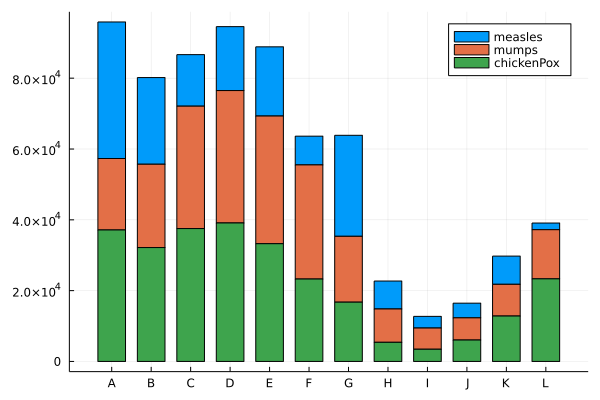

In [17]:
groupedbar([measles mumps chickenPox],
        bar_position = :stack,
        bar_width=0.7,
        xticks=(1:12, ticklabel),
        label=["measles" "mumps" "chickenPox"])

### Horizontal Bar Plot

`bar(data, orientation=:h)`

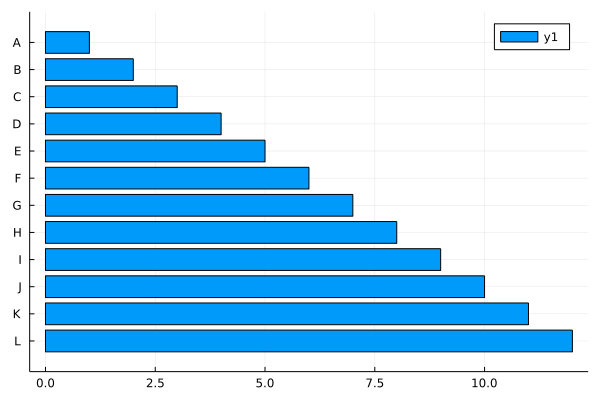

In [18]:
bar(1:12, orientation=:h, yticks=(1:12, ticklabel), yflip=true)

### Categorical Histogram Plot

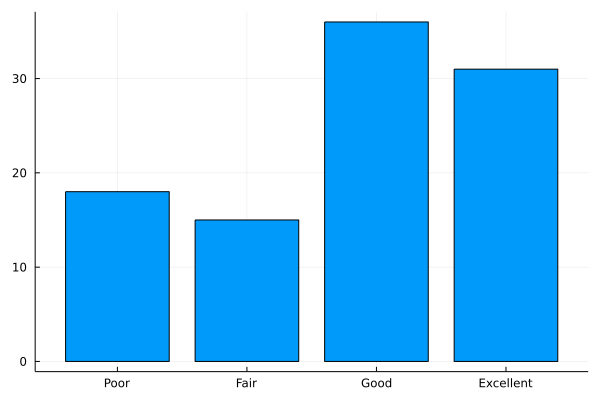

In [19]:
# Data
status = ["Poor", "Fair", "Good", "Excellent"]
data = sample(status, Weights([1,1,2,2]), 100)
datamap = countmap(data)

# Plot

bar((x -> datamap[x]).(status), xticks=(1:4, status), legend=nothing)

## Histogram

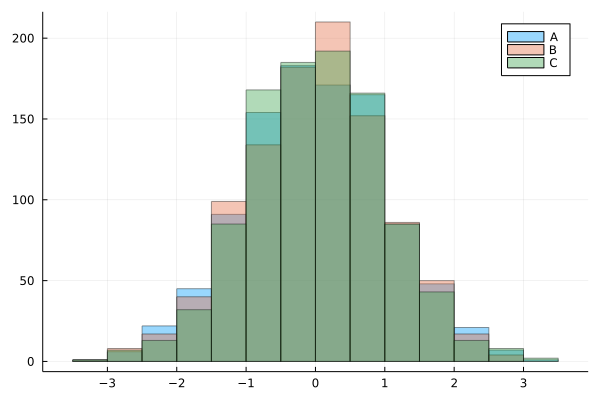

In [20]:
using Plots
Plots.gr(fmt=:png)

using Random
Random.seed!(2021)

x = randn(1000)
y = randn(1000)
z = randn(1000)

histogram(x, bins=20, alpha=0.4, label="A")
histogram!(y, bins=20, alpha=0.4, label="B")
histogram!(z, bins=20, alpha=0.4, label="C")

## Box plots

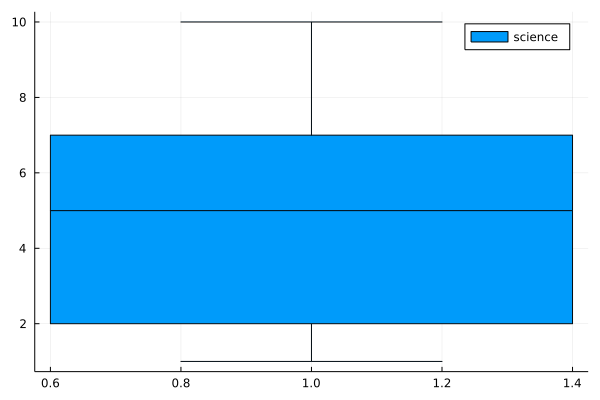

In [21]:
using Plots, StatsPlots, Statistics, Random
Plots.gr(fmt=:png)
Random.seed!(2021)

n = 30
science = rand(1:10, n)
boxplot(science, label="science")

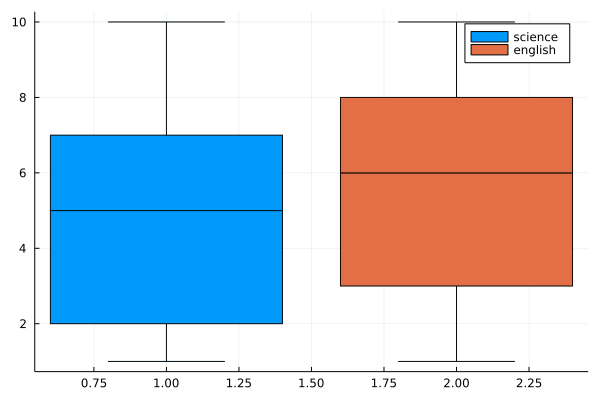

In [22]:
english = rand(1:10, n)
boxplot([science english], label=["science" "english"])

## Contour Plots
### Over a function

`contour(xs, ys, f)` where `f(x, y) = ...`

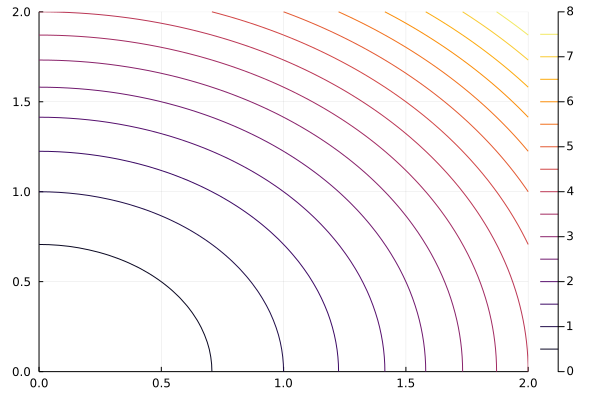

In [23]:
using Plots
Plots.gr(fmt=:png)

xs = range(0, stop=2, length=50)
ys = range(0, stop=2, length=50)
f(x , y) = x^2 + y^2

contour(xs, ys, f)

### Contour plot over an array

`contour(x1d, y1d, xy2d)`

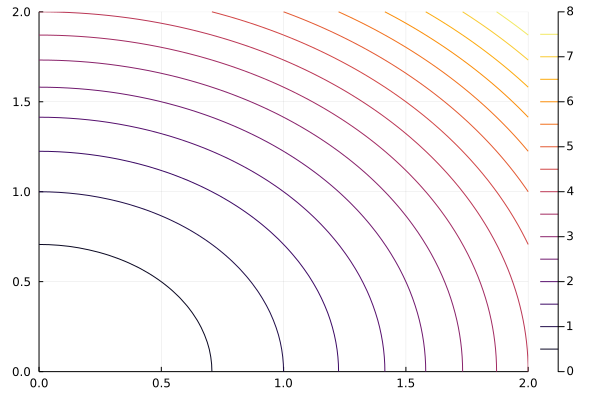

In [24]:
zz = f.(xs', ys)  # Notice the transpose over xs
contour(xs, ys, zz)

### Filled Contour Plots

- `contour(xs, ys, f, fill=true)`
- `contourf(xs, ys, f)`

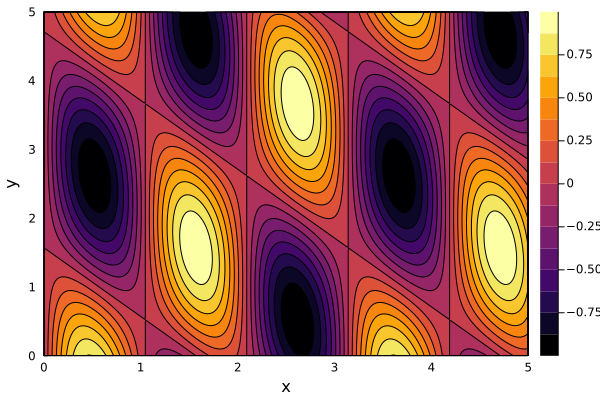

In [25]:
#=
contourf(0:0.01:5, 0:0.01:5, 
		(x, y) -> sin(3x) * cos(x+y), 
	    xlabel="x", ylabel="y")
=#

contour(0:0.01:5, 0:0.01:5, (x, y) -> sin(3x) * cos(x+y), xlabel="x", ylabel="y", fill=true)

## Datetime plot

- Use `Dates` package and `Data` data type
- Customize ticks

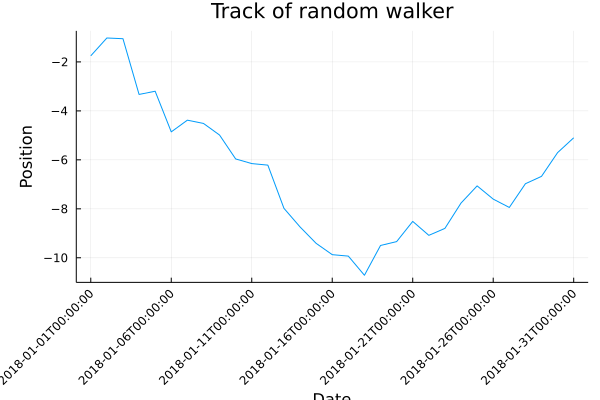

In [26]:
using Plots, Measures, Random, Dates
Plots.gr(fmt=:png)
Random.seed!(2021)

days = 31
position = cumsum(randn(days))
x = Date(2018,1,1):Day(1):Date(2018,1,31)
ticks = [x[i] for i in 1:5:length(x)]

plot(x, position,
     xlabel="Date",
     ylabel="Position",
     title="Track of random walker",
	 legend=nothing,
     xticks=ticks,
     xrotation=45,
     bottom_margin=5mm,
     left_margin=5mm)

## Error bar

`plots(..., xerr=xerr, yerr=yerr)`

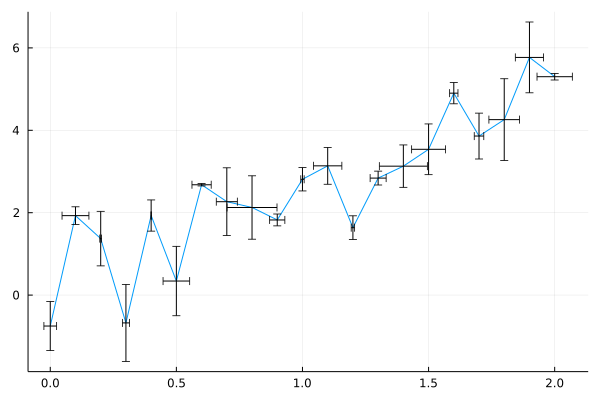

In [27]:
using Plots
using Random
Random.seed!(2021)

f(x) = 2 * x + 1
x = 0:0.1:2
n = length(x)
y = f.(x) + randn(n)

plot(x, y,
    xerr=0.1 * rand(n),
    yerr=rand(n),
	legend=nothing)

## Heatmap

`heatmap(data)`

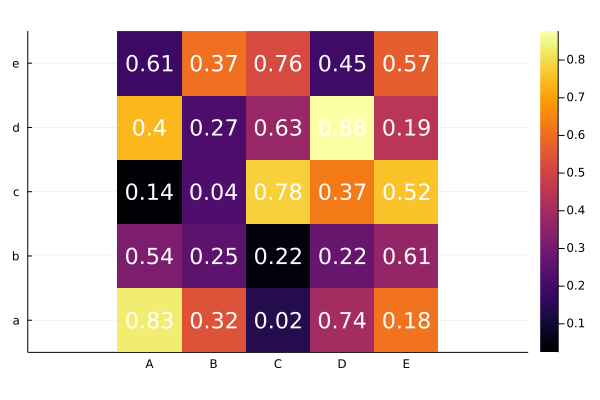

In [28]:
using Plots
Plots.gr(fmt=:png)
using Random
Random.seed!(2021)

a = rand(5,5)
xlabel = string.(collect('A':'E'))
ylabel = string.(collect('a':'e'))
heatmap(a, xticks=(1:5, xlabel), 
           yticks=(1:5, ylabel),
           aspect_ratio=:equal)

fontsize = 15
nrow, ncol = size(a)

# Add number annotations to plots
ann = [(i,j, text(round(a[i,j], digits=2), fontsize, :white, :center))
            for i in 1:nrow for j in 1:ncol]
annotate!(ann, linecolor=:white)

## Line plots

```julia
using Plots

plot(x, y)

plot(f, xRange)

plot(f, xMin, xMax)

plot(x, [y1 y2])
```

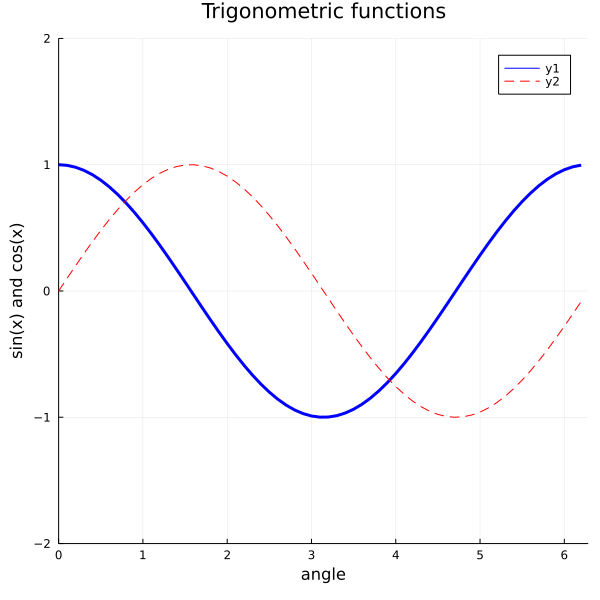

In [29]:
using Plots
Plots.gr(fmt=:png)
using Random
Random.seed!(2021)

# Data
x = 0:0.1:2pi
y1 = cos.(x)
y2 = sin.(x)

# Creating a plot in steps
plot(x, y1, color="blue", linewidth=3)
plot!(x, y2, color="red", line=:dash)
title!("Trigonometric functions")
xlabel!("angle")
ylabel!("sin(x) and cos(x)")
plot!(xlims=(0,2pi), ylims=(-2, 2), size=(600, 600))

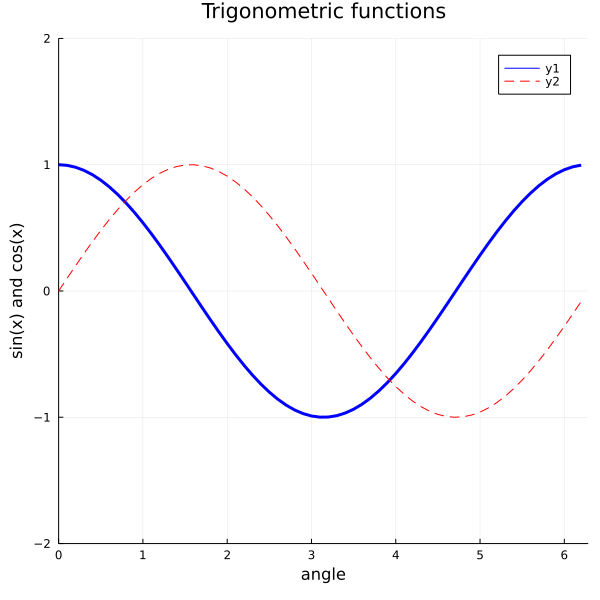

In [30]:
plot(x, y1, line=(:blue, 3))
plot!(x, y2, line=(:dash, :red))
# One set function to rule them all
plot!(title="Trigonometric functions",
        xlabel="angle",
        ylabel="sin(x) and cos(x)",
        xlims=(0,2pi), ylims=(-2, 2), size=(600, 600))

### Plotting multiple series

- One row = one observation
- One column = one species

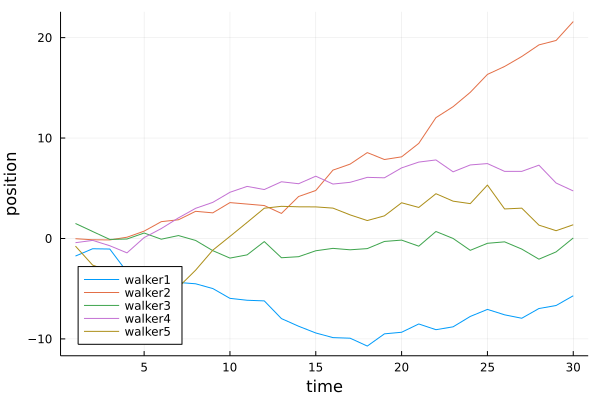

In [31]:
time = 30
walker1 = cumsum(randn(time))
walker2 = cumsum(randn(time))
walker3 = cumsum(randn(time))
walker4 = cumsum(randn(time))
walker5 = cumsum(randn(time))
plot(1:time, [walker1 walker2 walker3 walker4 walker5],
    xlabel="time", ylabel="position",
    label=["walker1" "walker2" "walker3" "walker4" "walker5"],
    legend=:bottomleft)

### Parameteric plots

Functions can be plotted directly.

- `plot(f, xmin, xmax)`
- `plot(f, range_of_x)`

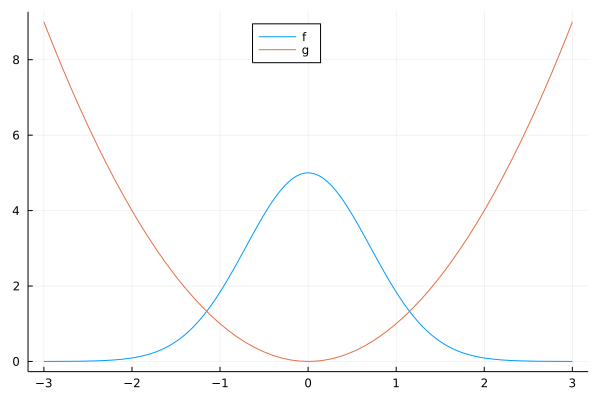

In [32]:
f(x) = 5exp(-x^2)
g(x) = x^2
plot([f, g], -3, 3, label=["f" "g"], legend=:top)

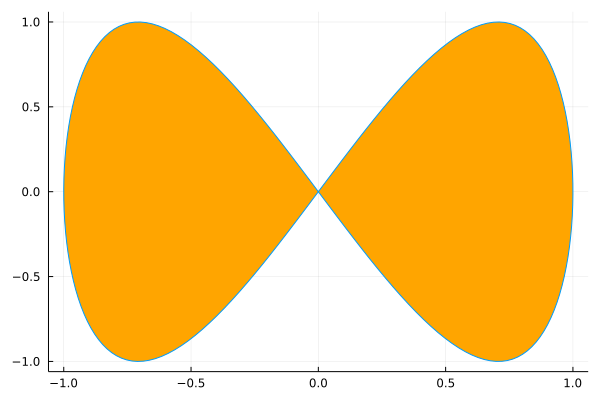

In [33]:
plot(sin, t->sin(2t), 0, 2π, leg=false, fill=(0,:orange))

## 3D line plot

Similar to 2D line plots.

`plot(fx(t), fy(t), fz(t), tmin, tmax [, kwargs...])`

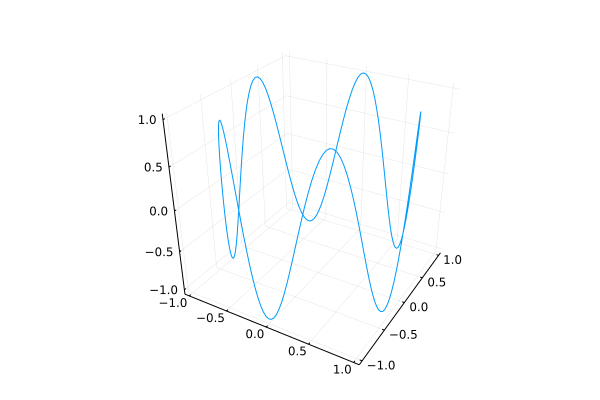

In [34]:
# 3D parametric plot
plot(cos, sin, t->sin(5t), 0, 2pi, legend=nothing)

### Line colors

`plot(x, y, c=color)`

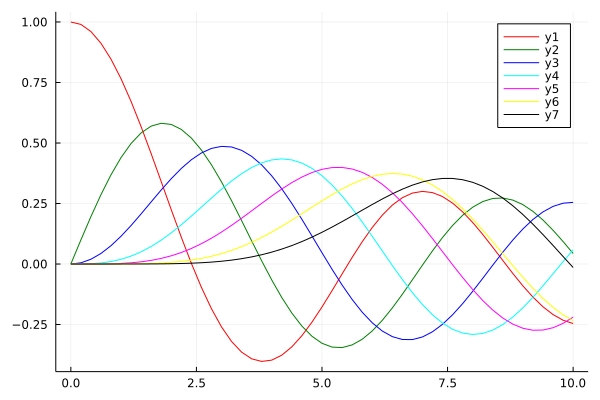

In [35]:
using Plots, SpecialFunctions
Plots.gr(fmt=:png)

x = 0:0.2:10
y0 = besselj.(0,x)
y1 = besselj.(1,x)
y2 = besselj.(2,x)
y3 = besselj.(3,x)
y4 = besselj.(4,x)
y5 = besselj.(5,x)
y6 = besselj.(6,x)
colors = [:red :green :blue :cyan :magenta :yellow :black]
plot(x, [y0 y1 y2 y3 y4 y5 y6], c=colors)

### Line styles

Plots.supported_styles() = [:auto, :dash, :dashdot, :dashdotdot, :dot, :solid]


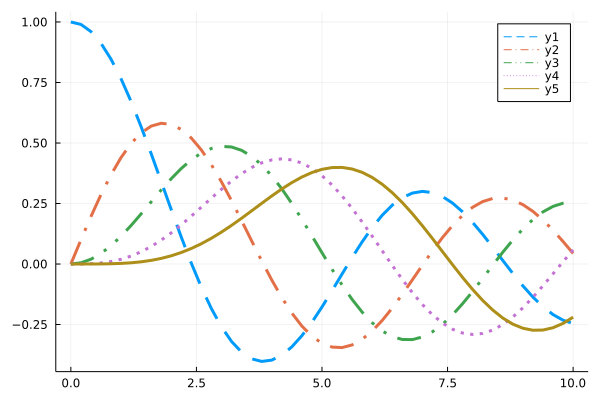

In [36]:
using Plots
Plots.gr(fmt=:png)
@show Plots.supported_styles()

style = Plots.supported_styles()[2:end]
style = reshape(style, 1, length(style))

plot(x, [y0 y1 y2 y3 y4], line=(3, style))

## Polar Plots

`plot(θ, r, proj=:polar)`

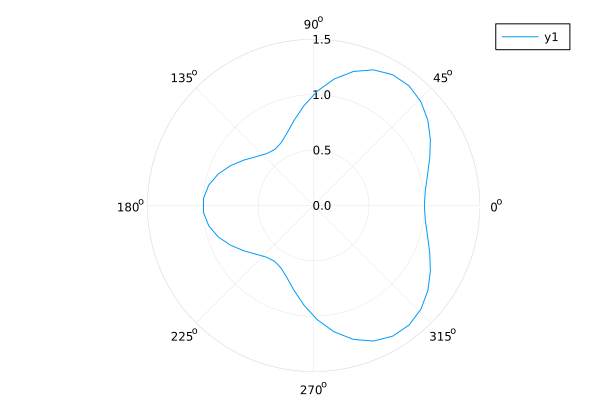

In [37]:
using Plots
Plots.gr(fmt=:png)
using Random
Random.seed!(2021)

r(θ) = 1 + cos(θ) * sin(θ)^2
θ = range(0, stop=2π, length=50)
plot(θ, r.(θ), proj=:polar, lims=(0,1.5))

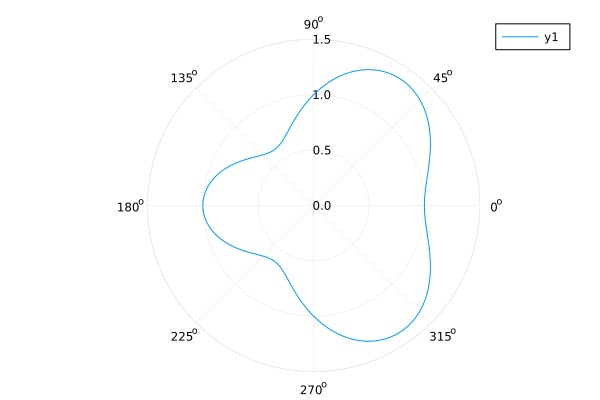

In [38]:
# One-liner
plot(θ -> 1 + cos(θ) * sin(θ)^2, 0, 2π, proj=:polar, lims=(0,1.5))

### Rose Plots

`plot(..., proj=:polar, line=:steppre)`

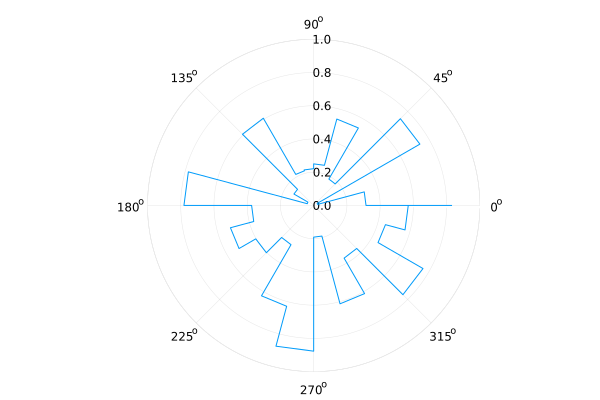

In [39]:
n = 24
R = rand(n+1)
plot(0:2pi/n:2pi, R, proj=:polar, line=:steppre, lims=(0, 1), legend=nothing)

## Quiver Plots

- `quiver(x1d, y1d, quiver=(vx1d, vy1d)`
- `quiver(x2d, y2d, quiver=(x, y)->(u, v))`

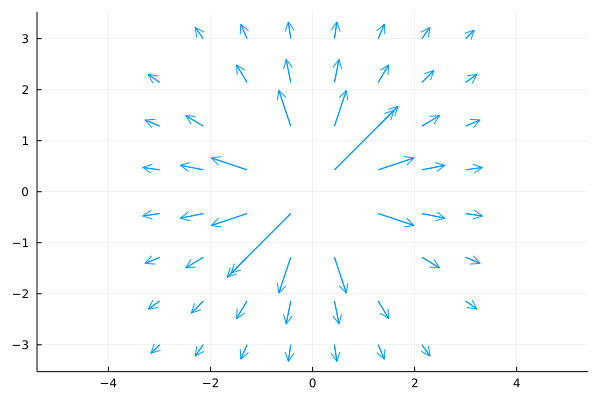

In [40]:
using Plots
Plots.gr(fmt=:png)

n = 7
f(x,y) = hypot(x, y) |> inv

x = repeat(-3:(2*3)/n:3, 1, n) |> vec
y = repeat(-3:(2*3)/n:3, 1, n)' |> vec
vx = f.(x,y) .* cos.(atan.(y,x)) |> vec
vy = f.(x,y) .* sin.(atan.(y,x)) |> vec
quiver(x, y, quiver=(vx, vy), aspect_ratio=:equal)

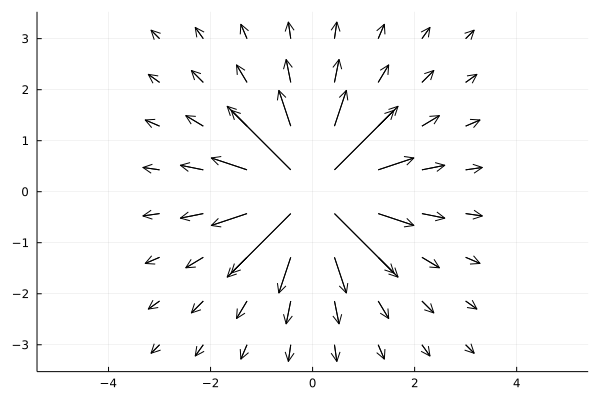

In [41]:
g(x, y) = [f(x,y) * cos(atan(y,x)), f(x,y) * sin(atan(y,x))]
xx = [x for y in -3:(2*3)/n:3, x in -3:(2*3)/n:3]
yy = [y for y in -3:(2*3)/n:3, x in -3:(2*3)/n:3]
quiver(xx, yy, quiver=g, aspect_ratio=:equal, color=:black)

## Scatter Plots 

2D Scatter Plots: `scatter(xpos, ypos)`

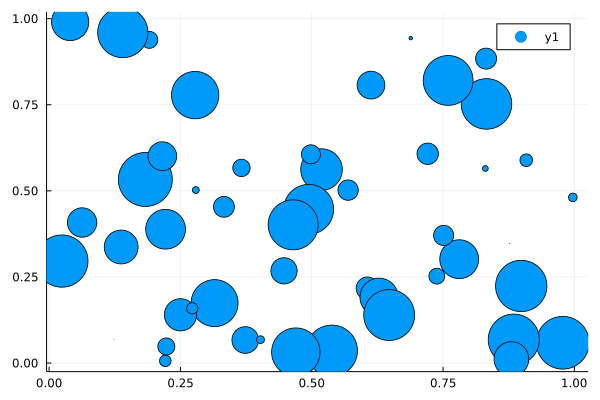

In [42]:
using Plots
Plots.gr(fmt=:png)
using Random
Random.seed!(2021)

n = 50
x = rand(n)
y = rand(n)
ms = rand(50) * 30
scatter(x, y, markersize=ms)

3D Scatter Plots: `scatter(xpos, ypos, zpos)`

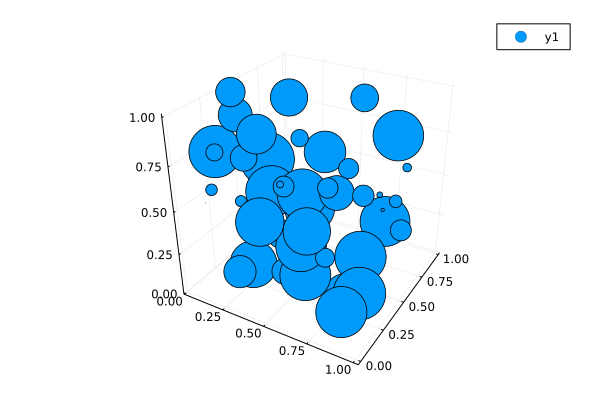

In [43]:
z = rand(n)

scatter(x, y, z, markersize=ms)

## Stairstep plot

`plot(..., line=:steppre)`

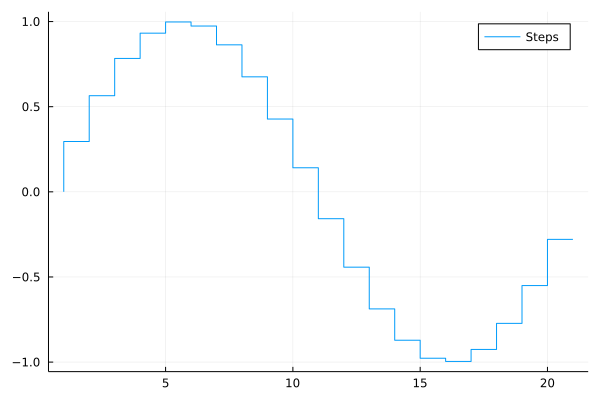

In [44]:
using Plots
Plots.gr(fmt=:png)

plot(sin.(0:0.3:2pi), line=:steppre, label="Steps")

## Stem plot

A.k.a lolipop plot.

`plot(..., line=:stem)`

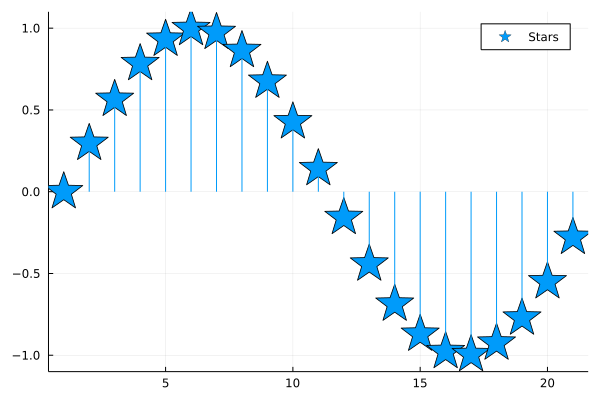

In [45]:
using Plots
Plots.gr(fmt=:png)

plot(sin.(0:0.3:2pi), line=:stem, marker=:star, markersize=20, ylims=(-1.1, 1.1), label="Stars")

## Subplots

- `plot(p1, p2, p3, ...)`
- `plot(..., layout=(nrow, ncol))`
- `plot(..., layout=@layout [...])`

[Source](https://docs.juliaplots.org/latest/layouts/)

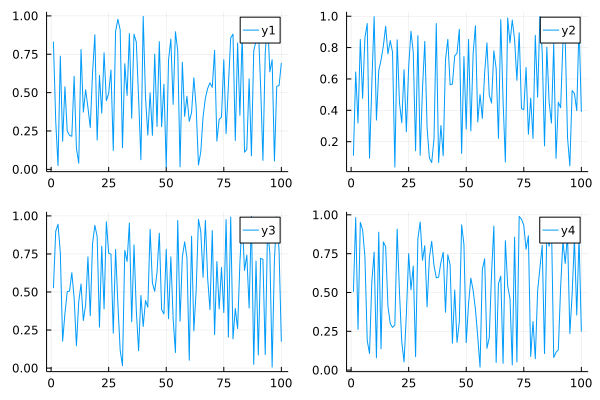

In [46]:
using Plots
Plots.gr(fmt=:png)
using Random
Random.seed!(2021)

data = rand(100, 4)

# create a 2x2 grid, and map each of the 4 series to one of the subplots
plot(data, layout = 4)

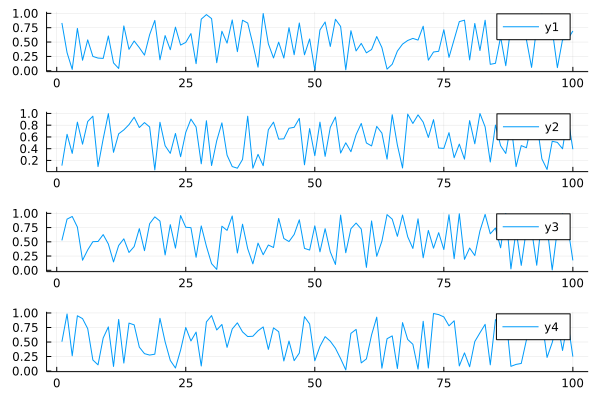

In [47]:
# create a 4x1 grid, and map each of the 4 series to one of the subplots
plot(data, layout = (4, 1))

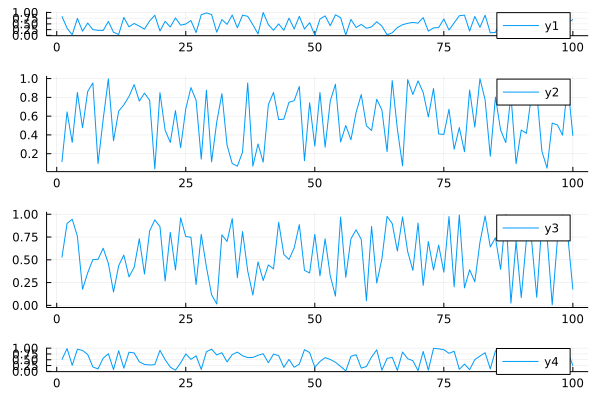

In [48]:
# More complex grid layouts can be created with the grid(...) constructor:
plot(data, layout = grid(4, 1, heights=[0.1 ,0.4, 0.4, 0.1]))

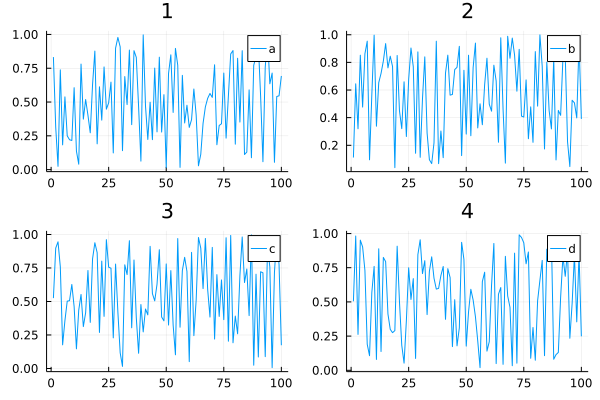

In [49]:
# Adding titles and labels
plot(data, layout = 4, label=["a" "b" "c" "d"], title=["1" "2" "3" "4"])

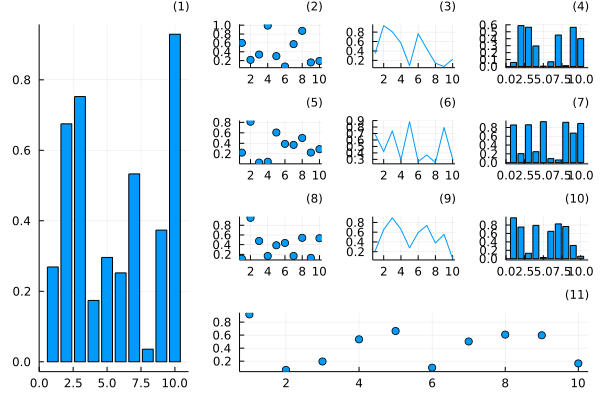

In [50]:
l = @layout [
    a{0.3w} [grid(3,3)
             b{0.2h}  ]
]
plot(
    rand(10, 11),
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for j in 1:1, i in 1:11], titleloc = :right, titlefont = font(8)
)

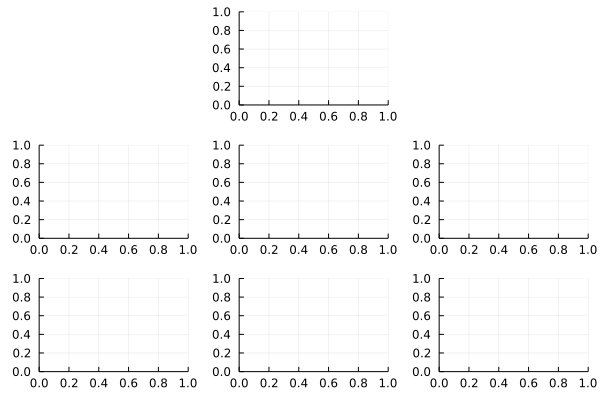

In [51]:
# Use _ to ignore a spot in the layout
plot((plot() for i in 1:7)..., layout=@layout([_ ° _; ° ° °; ° ° °]))

### Build subplot components indivisually

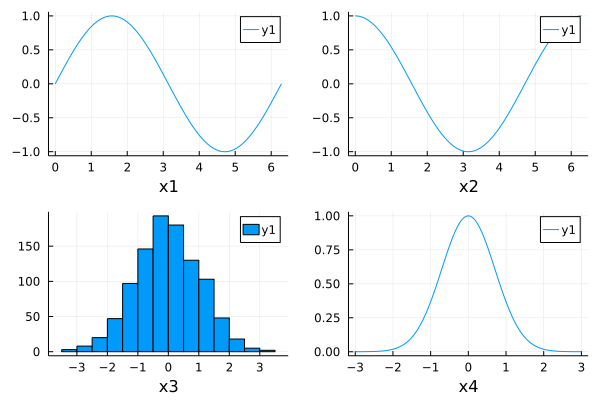

In [52]:
p1 = plot(sin, 0, 2pi, xlabel="x1")
p2 = plot(cos, 0, 2pi, xlabel="x2")
p3 = histogram(randn(1000), xlabel="x3")
p4 = plot(x->exp(-x^2), -3, 3, xlabel="x4")
plot(p1, p2, p3, p4)

## Surface plots

- `surface(x, y, z)`
- `surface(x, y, (x,y)->z)`
- `plot(x, y, z, linetype=:surface)`
- `plot(x, y, z, linetype=:wireframe)`

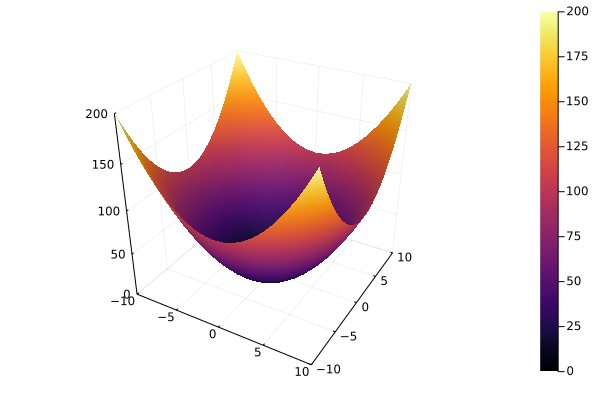

In [53]:
using Plots
Plots.gr(fmt=:png)

f(x,y) = x^2 + y^2
x = y = -10:10

surface(x, y, f)

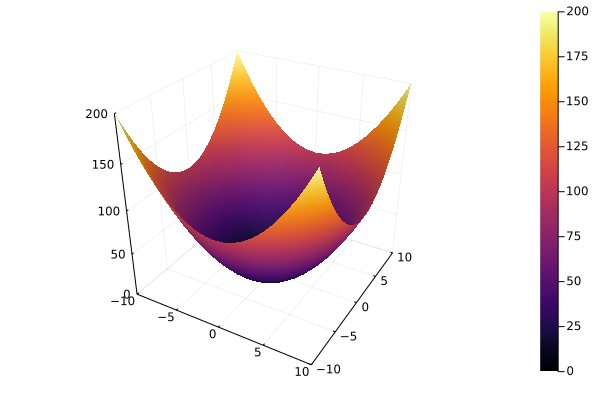

In [54]:
plot(x, y, f, linetype=:surface)

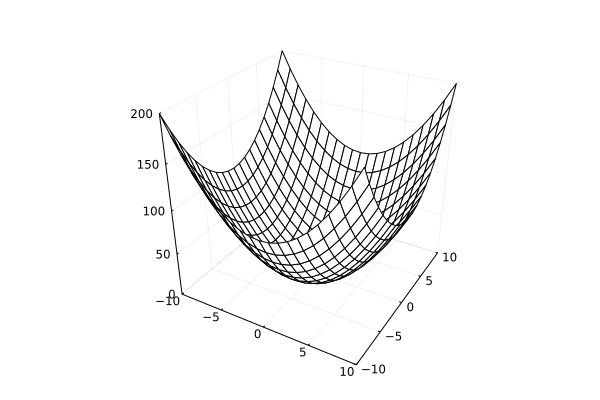

In [55]:
plot(x, y, f, linetype=:wireframe)

## Two Y Axis

`plot!(twinx())`

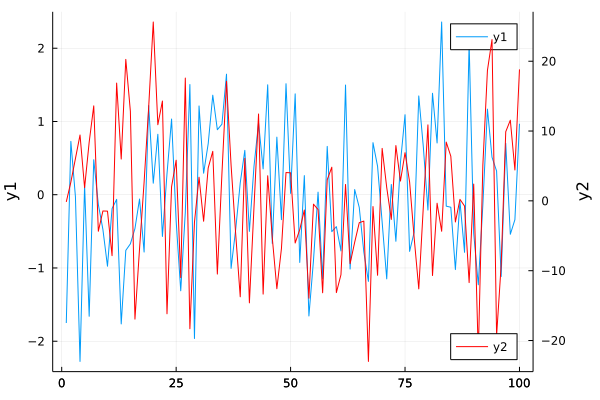

In [56]:
using Plots, Random, Measures
Plots.gr(fmt=:png)
Random.seed!(2021)

plot(randn(100), ylabel="y1", leg=:topright)
plot!(twinx(), randn(100)*10,
    c=:red,
    ylabel="y2",
    leg=:bottomright,
    size=(600, 400))
plot!(right_margin=15mm)

## Animations

In [57]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot
anim = @animate for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end

mp4(anim, "_static/lorenz.mp4", fps = 15)

┌ Info: Saved animation to 
│   fn = /tmp/cirrus-ci-build/docs/_static/lorenz.mp4
└ @ Plots /root/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/tmp/cirrus-ci-build/docs/_static/lorenz.mp4")